CO2 and Temperature Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in the temperature data
temp_0 = pd.read_excel('temperature_dataset.xlsx', sheet_name=0)
temp_1 = pd.read_excel('temperature_dataset.xlsx', sheet_name=1)
temp_2 = pd.read_excel('temperature_dataset.xlsx', sheet_name=2)
temp_3 = pd.read_excel('temperature_dataset.xlsx', sheet_name=3)
# Read in the CO2 data
co2_long = pd.read_csv('ghg-concentrations_fig-1_CO2ppm.csv',skiprows=6)
co2_long['Year (negative values = BC)'] = co2_long['Year (negative values = BC)'].astype(float)

In [4]:
# rebase to 1950 delta T
temp_0['Temperature Anomaly (°C) '] = temp_0['Temperature Anomaly (°C) '] + 0.836

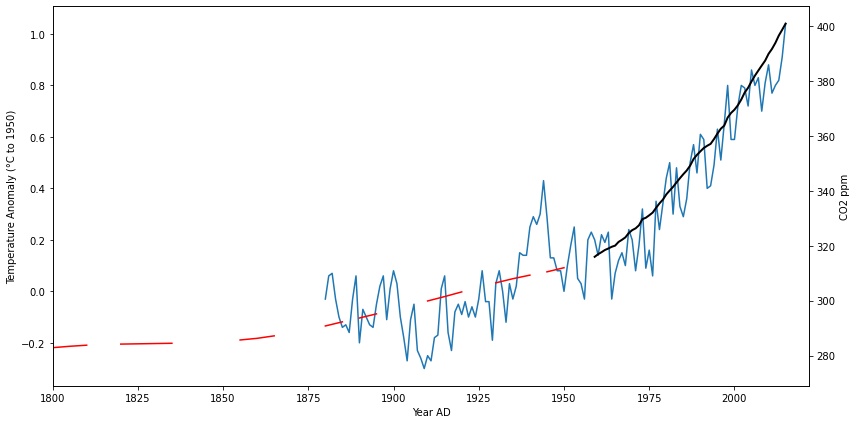

In [5]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year AD')
ax1.set_ylabel('Temperature Anomaly (°C to 1950)')
ax1.plot(temp_0['Year AD'], temp_0['Temperature Anomaly (°C) '], label='Temp. C')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('CO2 ppm')  # we already handled the x-label with ax1
ax2.plot(co2_long['Year (negative values = BC)'], co2_long['Mauna Loa, Hawaii'], label='CO2 Hawaii', color='k', linewidth=2)
ax2.plot(co2_long['Year (negative values = BC)'], co2_long['Law Dome, Antarctica (75-year smoothed)'], label='CO2 smoothed', color='red')


ax1.set_xlim(1800, 2022)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

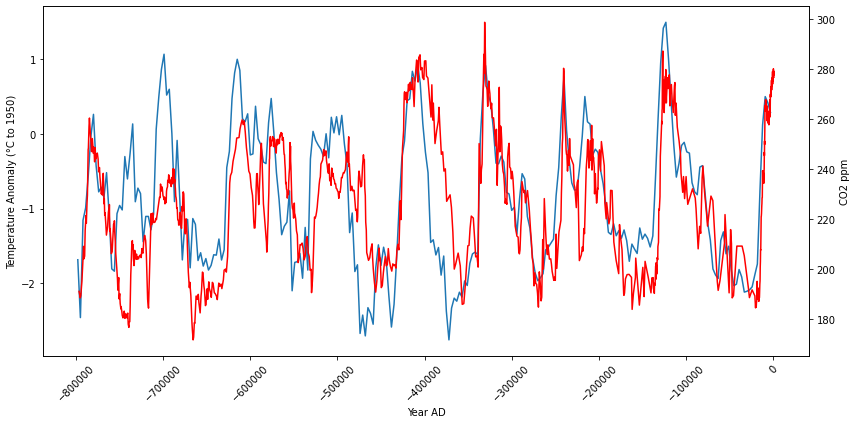

In [6]:
# long time scale

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year AD')
ax1.set_ylabel('Temperature Anomaly (°C to 1950)')
plt.xticks(rotation = 45)
ax1.plot(temp_3['Age (yr BP)']*-1, temp_3['Temperature Anomaly (°C) '], label='Temp. C')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('CO2 ppm')  # we already handled the x-label with ax1
ax2.plot(co2_long['Year (negative values = BC)'], co2_long['EPICA Dome C and  Vostok Station,  Antarctica'], label='CO2 Antarctica', color='red')


# ax1.set_xlim(-600000, -400000)
# ax1.set_xlim(-300000, -100000)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

array([[1.        , 0.64572548],
       [0.64572548, 1.        ]])

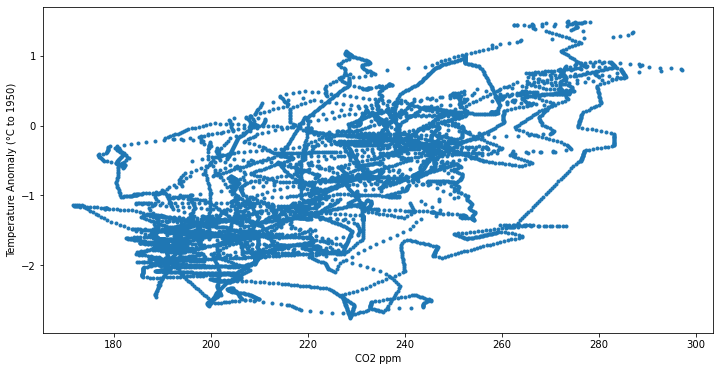

In [18]:
# convert to the same time spacing with interpolation
time_new = np.arange(-800000, -3000, 100) # common time spacing

co2_new = np.interp(time_new, co2_long['Year (negative values = BC)'], co2_long['EPICA Dome C and  Vostok Station,  Antarctica'])

time_temp = np.array(temp_3['Age (yr BP)']*-1)
values_temp = np.array(temp_3['Temperature Anomaly (°C) '])
temp_new = np.interp(time_new, np.flip(time_temp), np.flip(values_temp), right=np.nan)

len(temp_new)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(co2_new,temp_new,'.')
ax1.set_xlabel('CO2 ppm')
ax1.set_ylabel('Temperature Anomaly (°C to 1950)')
np.corrcoef(co2_new,temp_new)

Text(0, 0.5, 'correlation')

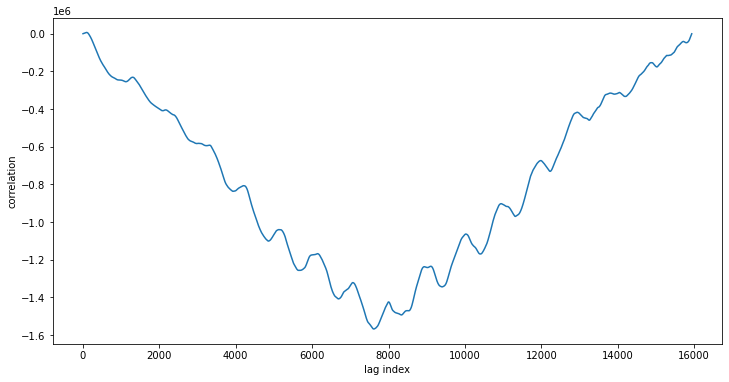

In [19]:
co2_corr = np.correlate(co2_new,temp_new, mode='full')

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(co2_corr)
ax1.set_xlabel('lag index')
ax1.set_ylabel('correlation')

array([[1.        , 0.62813858],
       [0.62813858, 1.        ]])

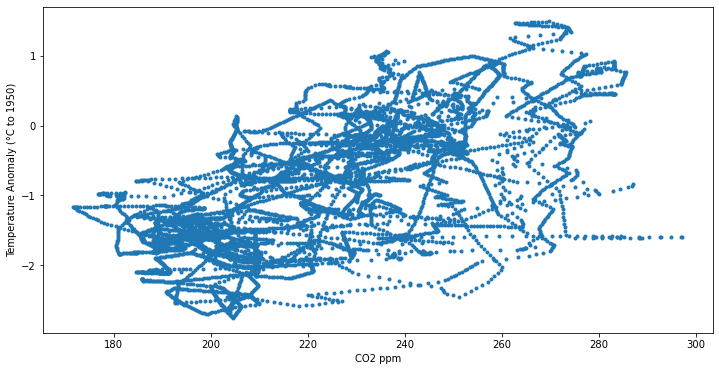

In [20]:
max_cor = np.argmax(co2_corr)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(co2_new[max_cor:],temp_new[:-1*max_cor],'.')
ax1.set_xlabel('CO2 ppm')
ax1.set_ylabel('Temperature Anomaly (°C to 1950)')
np.corrcoef(co2_new[max_cor:],temp_new[:-1*max_cor])